# Tools — Agregacja wyników wielu osób (Projekt A) — FIXED

## Dlaczego wcześniej nie znalazło folderów `..._anon`?
Najczęstszy powód: uruchomiłeś notebook agregujący z folderu `tools/`, a on szukał w `ROOT="."`,
czyli **w `tools/`**, a foldery studentów powstawały obok notebooków (np. `notebooks_student/`).

W tej wersji:
- domyślny `ROOT` jest ustawiony na katalog **nadrzędny** (`..`),
- wyszukiwanie jest **rekurencyjne** (przeszukuje podfoldery),
- pokazujemy listę znalezionych plików, żeby łatwo debugować.

Jeśli dalej nic nie znajdzie — ustaw `ROOT` ręcznie na katalog, w którym leżą `outputs_studentA_*`.


In [1]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import sys

# import rnnlab
sys.path.append(os.path.abspath(".."))
import rnnlab


In [2]:
# ====== USTAW ROOT ======
# Domyślnie: katalog nadrzędny względem tools/ (tam, gdzie zwykle leżą outputs_studentA_*)
ROOT = os.path.abspath("..")

# Jeśli odpalałeś notebooki z innego miejsca, ustaw ROOT ręcznie, np.:
# ROOT = "/home/piotr/path/to/rnn_team_projects_ACD_v2"

print("ROOT =", ROOT)


ROOT = D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuronowe\GSN_projekt_grupowy


In [3]:
# ====== ZNAJDŹ CSV (rekurencyjnie) ======
pattern = os.path.join(ROOT, "**", "outputs_studentA_*", "A_runs_*.csv")
csv_paths = glob.glob(pattern, recursive=True)

print("Found CSVs:", len(csv_paths))
for p in csv_paths[:20]:
    print(" -", p)


Found CSVs: 29
 - D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuronowe\GSN_projekt_grupowy\notebooks_student\outputs_studentA_anon76\A_runs_anon76_20260213_130150_distractors_rnn_h2_poolattn_seq1-50_n8_seed0-2.csv
 - D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuronowe\GSN_projekt_grupowy\notebooks_student\outputs_studentA_anon76\A_runs_anon76_20260213_130258_distractors_rnn_h1_poolattn_seq1-50_n8_seed0-2.csv
 - D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuronowe\GSN_projekt_grupowy\notebooks_student\outputs_studentA_anon76\A_runs_anon76_20260213_130349_distractors_rnn_h4_poolattn_seq1-50_n8_seed0-2.csv
 - D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuronowe\GSN_projekt_grupowy\notebooks_student\outputs_studentA_anon76\A_runs_anon76_20260213_130422_distractors_rnn_h8_poolattn_seq1-50_n8_seed0-2.csv
 - D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuronowe\GSN_projekt_grupowy\notebooks_student\outputs_studentA_anon76\A_runs_anon76_20260213_130446_distractors_rnn_h16_poolattn_seq1-50_n8_seed0-2.csv
 - D

In [4]:
# ====== LOAD + CONCAT ======
dfs = []
for p in csv_paths:
    df = pd.read_csv(p)
    df["source_path"] = p
    dfs.append(df)

all_runs = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
print("Total rows:", len(all_runs))
display(all_runs.head())


Total rows: 537


,model,pooling,task_variant,seq_len,hidden,seed,best_test_acc,success,steps_ran,train_time_sec,student_id,file_tag,source_path
0,rnn,attn,distractors,1,2,0,1.0,1,300,0.443231,anon76,anon76_20260213_130150_distractors_rnn_h2_pool...,D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuron...
1,rnn,attn,distractors,1,2,1,1.0,1,300,0.383802,anon76,anon76_20260213_130150_distractors_rnn_h2_pool...,D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuron...
2,rnn,attn,distractors,1,2,2,1.0,1,300,0.382164,anon76,anon76_20260213_130150_distractors_rnn_h2_pool...,D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuron...
3,rnn,attn,distractors,2,2,0,1.0,1,300,0.408201,anon76,anon76_20260213_130150_distractors_rnn_h2_pool...,D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuron...
4,rnn,attn,distractors,2,2,1,1.0,1,300,0.396684,anon76,anon76_20260213_130150_distractors_rnn_h2_pool...,D:\Studia\INFA_IIs_25_26\Glebokie Sieci Neuron...


In [5]:
# ====== SUMMARIZE ======
if len(all_runs) > 0:
    summary = rnnlab.summarize_frontier(all_runs)
    display(summary.head(20))
else:
    summary = None


,model,pooling,seq_len,hidden,P_success,mean_best_acc,std_best_acc,mean_steps
0,gru,attn,10,4,1.0,1.0,0.0,300.0
1,gru,attn,10,20,1.0,1.0,0.0,300.0
2,gru,attn,30,4,1.0,1.0,0.0,300.0
3,gru,attn,30,20,1.0,1.0,0.0,300.0
4,gru,attn,50,4,1.0,1.0,0.0,300.0
5,gru,attn,50,20,1.0,1.0,0.0,300.0
6,gru,attn,70,4,1.0,1.0,0.0,300.0
7,gru,attn,70,20,1.0,1.0,0.0,300.0
8,gru,attn,90,20,1.0,1.0,0.0,300.0
9,gru,attn,100,4,1.0,1.0,0.0,300.0


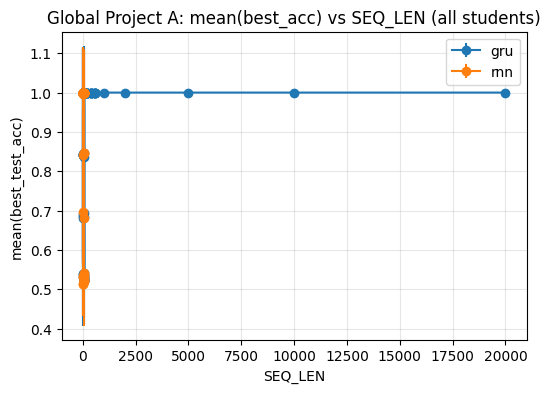

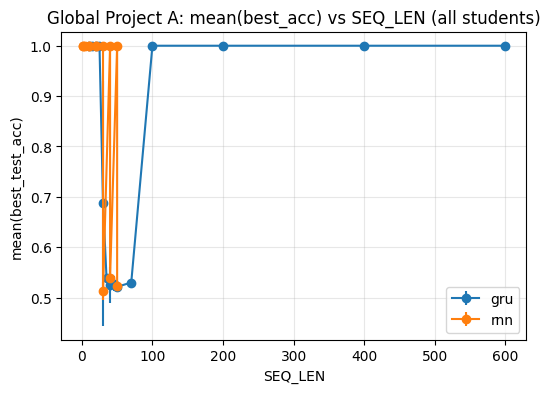

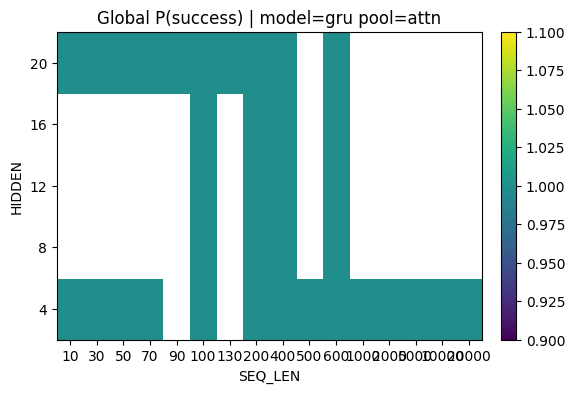

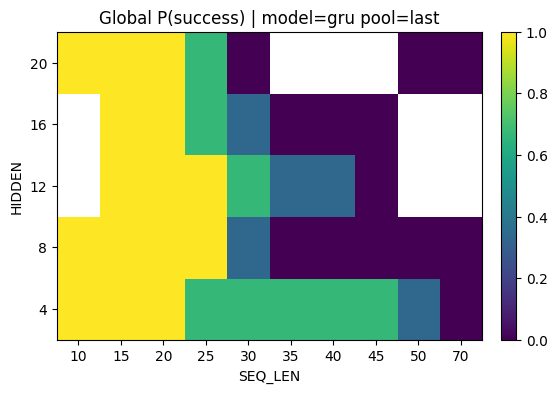

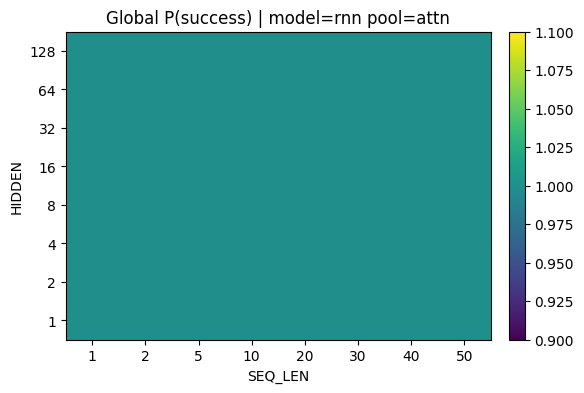

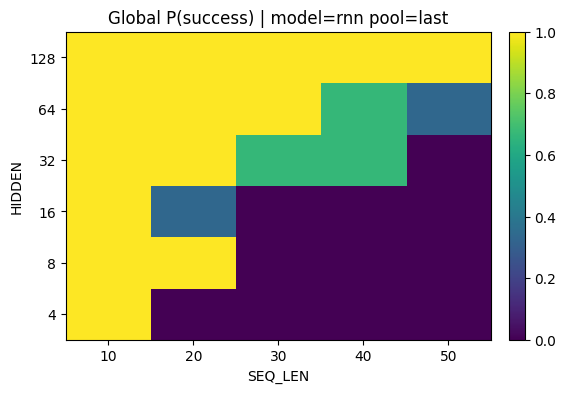

In [6]:
# ====== PLOTS ======
if summary is not None:
    rnnlab.plot_lines_acc(summary, title="Global Project A: mean(best_acc) vs SEQ_LEN (all students)")
    rnnlab.plot_lines_acc(summary[summary["hidden"] == 8], title="Global Project A: mean(best_acc) vs SEQ_LEN (all students)")
    plt.show()

    # heatmapy P_success per model+pooling
    for (m, pool) in sorted(summary[["model","pooling"]].drop_duplicates().itertuples(index=False, name=None)):
        sdf = summary[(summary["model"]==m) & (summary["pooling"]==pool)].copy()
        if len(sdf["hidden"].unique())>=2 and len(sdf["seq_len"].unique())>=2:
            rnnlab.plot_heatmap(
                sdf,
                value_col="P_success",
                title=f"Global P(success) | model={m} pool={pool}",
            )
            plt.show()
